In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import tensorflow as tf
import holidays

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
sale_path = "/home/haohy/TSF/project/repertory/repertory-rest/forecasting_algorithm/data/sales_train_v2.csv"

In [3]:
sale_df = pd.read_csv(sale_path)

NameError: name 'pd' is not defined

In [22]:
def ts_1dim(series, idx_start, idx_end, n_after, title, fname=False):
    
    fig, ax = plt.subplots()
    ls = len(series[idx_start:idx_end])
    ax.plot(list(range(1, ls+1)), series[idx_start:idx_end].values, 'b-')
    ax.plot(list(range(ls, ls+n_after+1)), series[idx_end-1: idx_end+n_after], 'r:')
#     ax.scatter(list(range(ls+1, ls+n_after+1)), series[idx_end: idx_end+n_after], color='red')
#     ax.set_xticks(list(range(1, ls+2)))
    ax.set_title(title)
    if fname:
        fig.savefig('./save/'+title+'.pdf', format='pdf')
    plt.savefig(title+'.png')
    plt.close()
    return fig

In [147]:
def get_date_feature(df, date_col):
    df['month'] = df[date_col].apply(lambda x: x.month)
    df['day'] = df[date_col].apply(lambda x: x.day)
    df['dayofweek'] = df[date_col].apply(lambda x: x.dayofweek)
    df['daysinmonth'] = df[date_col].apply(lambda x: x.daysinmonth)
    df['hour'] = df[date_col].apply(lambda x: x.hour)
    df['minute'] = df[date_col].apply(lambda x: x.minute)    
    df['holiday'] = df[date_col].apply(lambda x: 1 if (x in us_holidays) else 0)
    return df

## TAS2016

In [153]:
dateparser = lambda x: pd.to_datetime(x)
tas = pd.read_csv("../examples/data/TAS2016.csv", parse_dates=['SETTLEMENTDATE'], date_parser=dateparser)

In [159]:
tas_new = get_date_feature(tas, 'SETTLEMENTDATE')

In [160]:
tas_new

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,month,day,dayofweek,daysinmonth,hour,minute,holiday
0,TAS1,2016-01-01 00:30:00,1034.88,98.52,TRADE,1,1,4,31,0,30,1
1,TAS1,2016-01-01 01:00:00,1035.77,99.25,TRADE,1,1,4,31,1,0,1
2,TAS1,2016-01-01 01:30:00,998.99,96.90,TRADE,1,1,4,31,1,30,1
3,TAS1,2016-01-01 02:00:00,974.48,99.37,TRADE,1,1,4,31,2,0,1
4,TAS1,2016-01-01 02:30:00,995.02,100.34,TRADE,1,1,4,31,2,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17563,TAS1,2016-12-31 22:00:00,961.66,43.15,TRADE,12,31,5,31,22,0,0
17564,TAS1,2016-12-31 22:30:00,926.43,25.98,TRADE,12,31,5,31,22,30,0
17565,TAS1,2016-12-31 23:00:00,913.44,23.43,TRADE,12,31,5,31,23,0,0
17566,TAS1,2016-12-31 23:30:00,910.63,28.13,TRADE,12,31,5,31,23,30,0


In [161]:
tas_new.to_csv('../examples/data/TAS2016.csv', index=False)

## NSW2013

In [162]:
dateparser = lambda x: pd.to_datetime(x)
nsw = pd.read_csv("../examples/data/NSW2013.csv", parse_dates=['SETTLEMENTDATE'], date_parser=dateparser)

In [163]:
nsw_new = get_date_feature(nsw, 'SETTLEMENTDATE')

In [164]:
nsw_new

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,month,day,hour,minute,holiday,dayofweek,daysinmonth
0,NSW1,2013-01-01 00:30:00,7166.97,46.61,TRADE,1,1,0,30,1,1,31
1,NSW1,2013-01-01 01:00:00,6928.11,46.32,TRADE,1,1,1,0,1,1,31
2,NSW1,2013-01-01 01:30:00,6541.21,44.76,TRADE,1,1,1,30,1,1,31
3,NSW1,2013-01-01 02:00:00,6253.60,42.86,TRADE,1,1,2,0,1,1,31
4,NSW1,2013-01-01 02:30:00,6003.44,42.86,TRADE,1,1,2,30,1,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,NSW1,2013-12-31 22:00:00,7136.00,49.45,TRADE,12,31,22,0,0,1,31
17516,NSW1,2013-12-31 22:30:00,7223.13,49.65,TRADE,12,31,22,30,0,1,31
17517,NSW1,2013-12-31 23:00:00,7236.37,49.63,TRADE,12,31,23,0,0,1,31
17518,NSW1,2013-12-31 23:30:00,7051.46,49.66,TRADE,12,31,23,30,0,1,31


In [165]:
nsw_new.to_csv('../examples/data/NSW2013.csv', index=False)

## Count number of parameters

In [189]:
import os, sys
import torch
import torch.nn as nn

In [175]:
sys.path += [os.path.abspath('..')]

In [176]:
sys.path

['/home/haohy/anaconda3/envs/dnn/lib/python36.zip',
 '/home/haohy/anaconda3/envs/dnn/lib/python3.6',
 '/home/haohy/anaconda3/envs/dnn/lib/python3.6/lib-dynload',
 '',
 '/home/haohy/.local/lib/python3.6/site-packages',
 '/home/haohy/anaconda3/envs/dnn/lib/python3.6/site-packages',
 '/home/haohy/anaconda3/envs/dnn/lib/python3.6/site-packages/pyecharts-1.9.0-py3.6.egg',
 '/home/haohy/anaconda3/envs/dnn/lib/python3.6/site-packages/IPython/extensions',
 '/home/haohy/.ipython',
 'os.getcwd()',
 '/home/haohy/TSF/deepts_torch/notebooks',
 '/home/haohy/TSF/deepts_torch']

In [211]:
from importlib import reload
import deepts
reload(deepts.models)
from deepts.models import DeepTCN3

In [212]:
model = DeepTCN3(48, 24, [1,2,4,8], 12, 32, 2, 3, 
                    2, 2, 1, 1, 20)

In [213]:
model

DeepTCN3(
  (tcn_layer): DeepTCN3Layer(
    (upsample): Linear(in_features=1, out_features=12, bias=True)
    (simple_resnet): Linear(in_features=216, out_features=32, bias=True)
    (decoder_cov): futureResidual(
      (fc1): Linear(in_features=20, out_features=64, bias=True)
      (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (fc2): Linear(in_features=64, out_features=32, bias=True)
      (bn2): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (decoder_predict): Decoder(
      (fc1): Linear(in_features=32, out_features=32, bias=True)
      (bn): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (dropout): Dropout(p=0.2, inplace=False)
      (fc2): Linear(in_features=32, out_features=1, bias=True)
    )
  )
)

In [204]:
for name, params in model.named_parameters():
    print(name)

layer_list.0.weight
layer_list.0.bias
layer_list.1.weight
layer_list.1.bias
layer_list.2.weight
layer_list.2.bias


In [184]:
model.tcn_layer.multi_blocks

[LSTM(12, 12), LSTM(12, 12), LSTM(12, 12), LSTM(12, 12)]

In [200]:
class CusModel(nn.Module):
    def __init__(self):
        super(CusModel, self).__init__()
        self.layer_list = nn.ModuleList()
        for i in range(3):
            self.layer_list.append(nn.Linear(10, 20))
#         self.layer2 = nn.Linear(10, 20)        
#         self.layer3 = nn.Linear(10, 20)        
    def forward(self, input1):
        out = input1
        for i in range(3):
            out = self.layer_list[i](out)
        return out

In [201]:
model = CusModel()

In [202]:
num_parameters_train = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [203]:
num_parameters_train

660

In [181]:
from ptflops import get_model_complexity_info

In [ ]:
flops, params = get_model_complexity_info(
    model, [(16, 48, 1), (), (16, 10)], as_strings=True, print_per_layer_stat=False)

## check result's pkl

In [216]:
import pickle

In [217]:
res_pkl = "/home/haohy/TSF/deepts_torch/examples/results/DeepTCN3_TAS2016_2021_03_12_09_59_40.pkl"

In [218]:
with open(res_pkl, 'rb') as f:
    res = pickle.load(f)

In [220]:
res.scaler

AttributeError: 'dict' object has no attribute 'scaler'

In [138]:
beijing_pm = '../data/beijing_pm25.csv'
bike_hour = '../data/bike_hour.csv'
solar_energy = '../data/solar_energy_1.csv'
nsw2013 = '../data/NSW2013.csv'
nsw2016 = '../data/NSW2016.csv'


In [140]:
file_paths = os.listdir('../examples/data')

In [141]:
file_paths

['TAS2016.csv',
 'bike_hour.csv',
 'pollution.csv',
 'NSW2016.csv',
 'NSW2013.csv',
 'solar_energy_1.csv',
 'AirPassengers.csv',
 'beijing_pm25.csv',
 'traffic_data_in_bits.csv']

In [4]:
prsa_df = pd.read_csv('../examples/data/PRSA_Data_Wanliu.csv')

In [147]:
df_list = [pd.read_csv('../examples/data/'+file_path) for file_path in file_paths]

In [151]:
df_TAS2016, df_bike_hour, df_pollution, df_NSW2016, df_NSW2013, df_solar_energy, df_airpassengers, df_beijingpm, df_traffic = df_list

In [7]:
prsa_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.000000,28.000000,400.000000,52.000000,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.000000,28.000000,400.000000,50.000000,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,6.911717,19.000000,400.000000,55.000000,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.000000,14.000000,350.672519,54.062852,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.000000,13.152519,300.000000,54.000000,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.000000,20.000000,300.000000,81.000000,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.000000,55.000000,500.000000,45.000000,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.000000,48.000000,500.000000,48.000000,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.000000,47.000000,500.000000,50.000000,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


In [23]:
for i in range(1, 1+5):
    ts_1dim(prsa_df['PM2.5'], 48*i, 48*i+96 , 24, "PRSA_"+str(i))

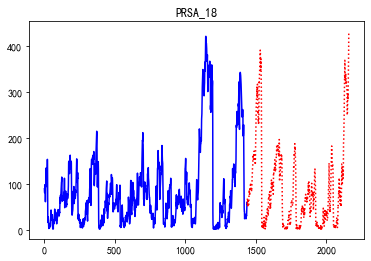

In [45]:
i = 18
ts_1dim(prsa_df['PM2.5'], 24*30*i, 24*30*i+2*24*30 , 24*30, "PRSA_"+str(i))

In [71]:
time_parser = lambda x: pd.to_datetime(x)
nsw_df = pd.read_csv('../examples/data/NSW2013.csv', parse_dates=['SETTLEMENTDATE'], date_parser=time_parser)

In [148]:
dateparser = lambda x: pd.to_datetime(x)
traffic_df = pd.read_csv('../examples/data/traffic_data_in_bits.csv', date_parser=dateparser, parse_dates=['datetime'])

In [149]:
traffic_df = get_date_feature(traffic_df, 'datetime')

In [152]:
traffic_df

,datetime,value,month,day,dayofweek,daysinmonth,hour,minute,holiday
0,2005-06-07 07:00:00,3562279127,6,7,1,30,7,0,0
1,2005-06-07 07:05:00,3710215571,6,7,1,30,7,5,0
2,2005-06-07 07:10:00,3877469703,6,7,1,30,7,10,0
3,2005-06-07 07:15:00,3876354871,6,7,1,30,7,15,0
4,2005-06-07 07:20:00,4582542581,6,7,1,30,7,20,0
...,...,...,...,...,...,...,...,...,...
14767,2005-07-28 13:35:00,6694253099,7,28,3,31,13,35,0
14768,2005-07-28 13:40:00,6795832158,7,28,3,31,13,40,0
14769,2005-07-28 13:45:00,6729727208,7,28,3,31,13,45,0
14770,2005-07-28 13:50:00,6741435273,7,28,3,31,13,50,0


In [151]:
traffic_df.to_csv('../examples/data/traffic_data_in_bits.csv', index=False)

In [ ]:
traffic_df.to

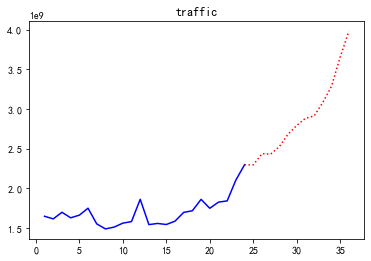

In [143]:
i = 22
ts_1dim(traffic_df.value, 12*2*i, 12*2*i+12*2, 12, 'traffic')

In [78]:
date = pd.to_datetime('2013-01-01 00:30:00')

In [74]:
nsw_df['month'] = nsw_df.SETTLEMENTDATE.apply(lambda x: x.month)

In [101]:
us_holidays = holidays.UnitedStates()

In [102]:
nsw_df['holiday'] = nsw_df.SETTLEMENTDATE.apply(lambda x: 1 if (x in us_holidays) else 0)

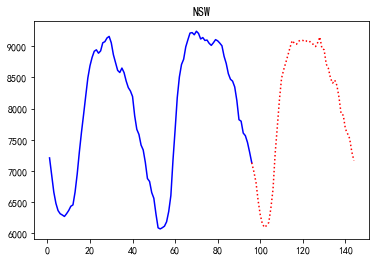

In [93]:
i = 40
ts_1dim(nsw_df['TOTALDEMAND'], 48*i, 48*i+96 , 48, "NSW")

In [85]:
nsw_df.drop(columns=['daysinmonth'], inplace=True)

In [104]:
nsw_df.to_csv('../examples/data/NSW2013.csv', index=False)

In [94]:
nsw_df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,month,day,hour,minute
0,NSW1,2013-01-01 00:30:00,7166.97,46.61,TRADE,1,1,0,30
1,NSW1,2013-01-01 01:00:00,6928.11,46.32,TRADE,1,1,1,0
2,NSW1,2013-01-01 01:30:00,6541.21,44.76,TRADE,1,1,1,30
3,NSW1,2013-01-01 02:00:00,6253.60,42.86,TRADE,1,1,2,0
4,NSW1,2013-01-01 02:30:00,6003.44,42.86,TRADE,1,1,2,30
...,...,...,...,...,...,...,...,...,...
17515,NSW1,2013-12-31 22:00:00,7136.00,49.45,TRADE,12,31,22,0
17516,NSW1,2013-12-31 22:30:00,7223.13,49.65,TRADE,12,31,22,30
17517,NSW1,2013-12-31 23:00:00,7236.37,49.63,TRADE,12,31,23,0
17518,NSW1,2013-12-31 23:30:00,7051.46,49.66,TRADE,12,31,23,30


In [106]:
prsa_df['date'] = prsa_df['year']+prsa_df['month']+prsa_df['day']

In [107]:
prsa_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,8.0,8.0,6.000000,28.000000,400.000000,52.000000,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,2017
1,2,2013,3,1,1,9.0,9.0,6.000000,28.000000,400.000000,50.000000,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu,2017
2,3,2013,3,1,2,3.0,6.0,6.911717,19.000000,400.000000,55.000000,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu,2017
3,4,2013,3,1,3,11.0,30.0,8.000000,14.000000,350.672519,54.062852,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu,2017
4,5,2013,3,1,4,3.0,13.0,9.000000,13.152519,300.000000,54.000000,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.000000,20.000000,300.000000,81.000000,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu,2047
35060,35061,2017,2,28,20,15.0,43.0,6.000000,55.000000,500.000000,45.000000,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu,2047
35061,35062,2017,2,28,21,13.0,35.0,7.000000,48.000000,500.000000,48.000000,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu,2047
35062,35063,2017,2,28,22,12.0,31.0,5.000000,47.000000,500.000000,50.000000,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu,2047


NameError: name 'torch' is not defined

In [153]:
for file, df in zip(file_paths, df_list):
    print(file)
    print(df.dtypes)
    print(df.head())
    print()

TAS2016.csv
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object
  REGION SETTLEMENTDATE  TOTALDEMAND     RRP PERIODTYPE
0   TAS1  2016/1/1 0:30      1034.88   98.52      TRADE
1   TAS1  2016/1/1 1:00      1035.77   99.25      TRADE
2   TAS1  2016/1/1 1:30       998.99   96.90      TRADE
3   TAS1  2016/1/1 2:00       974.48   99.37      TRADE
4   TAS1  2016/1/1 2:30       995.02  100.34      TRADE

bike_hour.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01     

<AxesSubplot:>

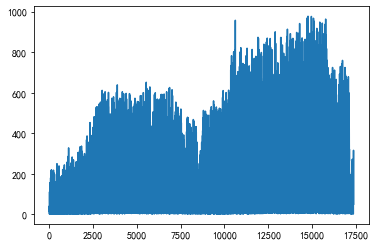

In [154]:
df_bike_hour.cnt.plot()

In [437]:
tf.expand_dims?

In [420]:
a = tf.random.normal((10, 1, 2))

In [438]:
output = tf.random.normal((32, 24, 22))
embed_concat = tf.random.normal((32, 24, 26))

InvalidArgumentError: Incompatible shapes: [32,24,22] vs. [32,24,26] [Op:AddV2]

In [427]:
tf.tile(a, [1, 10, :]).shape

SyntaxError: invalid syntax (<ipython-input-427-38123b0044b5>, line 1)

In [434]:
tf.random.uniform((2, 3), minval=0, maxval=10, dtype=tf.int32)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 5],
       [6, 9, 1]], dtype=int32)>

In [412]:
arr_1 = np.random.rand(10, 20)

In [414]:
arr_2 = np.random.rand(20, 10)

In [417]:
arr_1.reshape(arr_2.shape).shape

(20, 10)

In [418]:
layers.BatchNormalization()

In [419]:
tf.nn.relu([-1., 1, 2.3, -4.3])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0. , 1. , 2.3, 0. ], dtype=float32)>

In [35]:
df_raw = pd.read_csv('../data/bike_hour.csv', index_col=0)

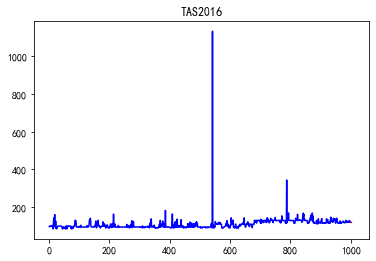

In [16]:
ts_1dim(df_TAS2016.RRP, 0, 1000, 10, 'TAS2016')

In [47]:
df_raw.weathersit.unique()

array([1, 2, 3, 4])

In [38]:
df_raw

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [32]:
df_bike_hour.hum.count()

17379

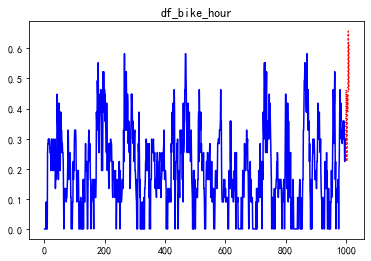

In [31]:
ts_1dim(df_bike_hour.windspeed, 0, 1000, 10, 'df_bike_hour')

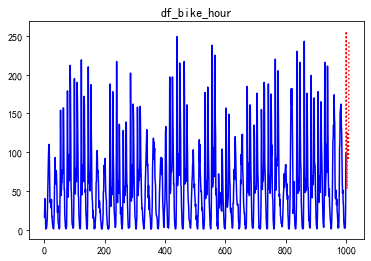

In [33]:
ts_1dim(df_bike_hour.cnt, 0, 1000, 10, 'df_bike_hour')

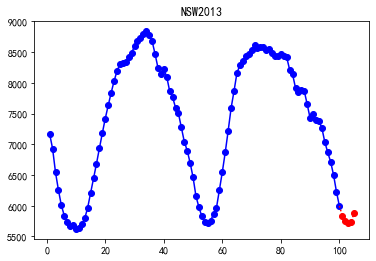

In [72]:
ts_1dim(df_NSW2013.TOTALDEMAND, 0, 100, 5, 'NSW2013')

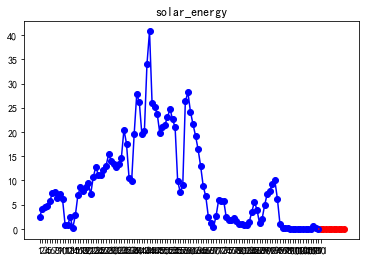

In [41]:
ts_1dim(df_solar_energy['Power(MW)'], 90, 200, 10, 'solar_energy')

In [172]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

In [174]:
sm.graphics.tsa.plot_acf?

In [159]:
dateparse = lambda date: datetime.strptime(date, '%Y-%m')
airpassenger_df = pd.read_csv('../examples/data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [160]:
ts = airpassenger_df['#Passengers']

In [161]:
# decomposition = seasonal_decompose(ts, model="additive")
decomposition = STL(ts).fit()
# decomposition.plot()
# plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


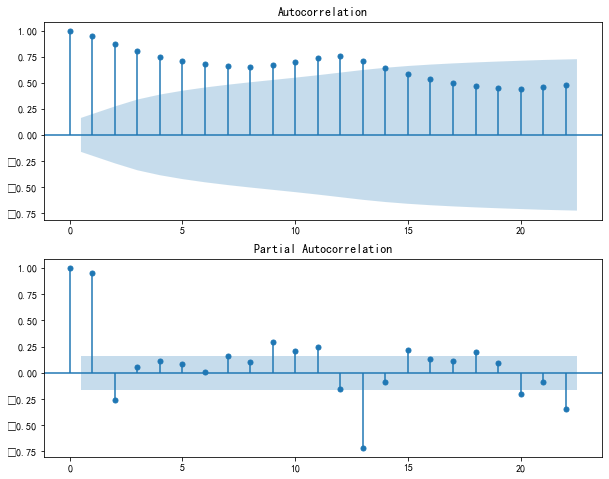

In [181]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sm.graphics.tsa.plot_acf(ts.values, axes[0])
sm.graphics.tsa.plot_pacf(ts.values, axes[1])
plt.close()
fig

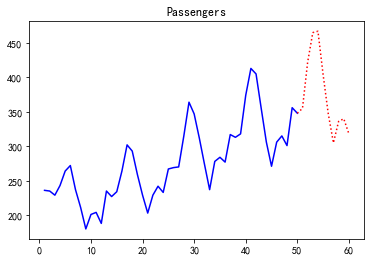

In [180]:
ts_1dim(df_airpassengers['#Passengers'], 50, 100, 10, 'Passengers')

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [243]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [338]:
def load_predictions(filename):
    with open(filename, 'rb') as f:
        testset = pickle.load(f)
    return testset

def plot_predictions(filename, ts_index):
#     logging = set_logging()
    fig, axes= plt.subplots(len(ts_index), 1, figsize=(8, 2+2*len(ts_index)))
    testset = load_predictions(filename)
    n_back = len(testset['y_back'][0])
    n_fore = len(testset['y_pred'][0])
    x_back = list(range(n_back))
    x_fore = list(range(n_back, n_back + n_fore))
    for idx, ts_idx in enumerate(ts_index):
        axes[idx].plot(x_back, testset['y_back'][ts_idx], label='back')
        axes[idx].plot(x_fore, testset['y_pred'][ts_idx], label='pred')
        axes[idx].plot(x_fore, testset['y_true'][ts_idx], label='true')
        axes[idx].legend()
        axes[idx].set_xticks(x_back + x_fore)
#         axes[idx].set_ylim([min_val, max_val])
#         axes[idx].set_yticks(np.arange(min_val, max_val, interval))
    plt.savefig(filename+'.png', format='png')
    plt.close()
    return fig


In [339]:
filename = "../examples/results/2021_02_20_16_41_46.pkl"

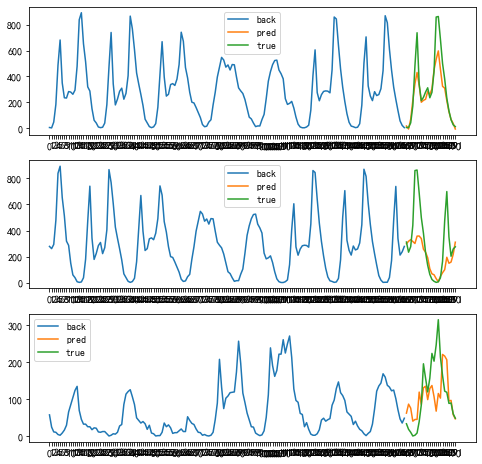

In [340]:
plot_predictions(filename, [0, 10, -1])

In [3]:
data = pd.DataFrame()

In [80]:
static = [0]*(168*10) + [1]*(168*10)

In [122]:
year = np.concatenate([[2020] * (168*5) + [2021] * (168*5)]*2)

In [123]:
month = [10]*9*24 + [11]*30*24 +[12]*31*24 + [10]*9*24 + [11]*30*24 +[12]*31*24

In [124]:
day = np.concatenate([list(np.repeat(list(range(23, 32)), 24)) + list(np.repeat(list(range(1, 31)), 24)) + list(np.repeat(list(range(1, 32)), 24))]*2) 

In [125]:
target = np.sin(np.linspace(0, 7*20*np.pi, 168*20))

In [126]:
dense = 3 * np.sin(np.linspace(0, 7*20*np.pi, 168*20))

In [127]:
dense_2 = 2 * np.sin(np.linspace(0, 7*20*np.pi, 168*20))

In [128]:
import holidays

In [129]:
us_holiday = holidays.UnitedStates()

In [130]:
'2020-01-01' in us_holiday

True

In [131]:
[1  if i == 2 else 2 for i in [1,2,3]]

[2, 1, 2]

In [132]:
holiday = [1 if str(year)+'-'+str(month)+'-'+str(day) in us_holiday else 0 for year,month,day in zip(year, month, day)]

In [134]:
len(holiday)

3360

In [139]:
data = pd.DataFrame({
    'static': static,
    'year': year,
    'month': month,
    'day': day,
    'holiday': holiday,
    'dense_1': dense,
    'dense_2': dense_2,
    'target': target
})

In [140]:
data.to_csv('demo.csv', index=False)

In [158]:
data.groupby('static').head(10)

,static,year,month,day,holiday,dense_1,dense_2,target
0,0,2020,10,23,0,0.000000,0.000000,0.000000
1,0,2020,10,23,0,0.391694,0.261130,0.130565
2,0,2020,10,23,0,0.776683,0.517789,0.258894
3,0,2020,10,23,0,1.148374,0.765583,0.382791
4,0,2020,10,23,0,1.500405,1.000270,0.500135
5,0,2020,10,23,0,1.826748,1.217832,0.608916
6,0,2020,10,23,0,2.121816,1.414544,0.707272
7,0,2020,10,23,0,2.380558,1.587039,0.793519
8,0,2020,10,23,0,2.598544,1.732362,0.866181
9,0,2020,10,23,0,2.772041,1.848027,0.924014


In [160]:
data[data['static'] == 0]

,static,year,month,day,holiday,dense_1,dense_2,target
0,0,2020,10,23,0,0.000000,0.000000,0.000000
1,0,2020,10,23,0,0.391694,0.261130,0.130565
2,0,2020,10,23,0,0.776683,0.517789,0.258894
3,0,2020,10,23,0,1.148374,0.765583,0.382791
4,0,2020,10,23,0,1.500405,1.000270,0.500135
...,...,...,...,...,...,...,...,...
1675,0,2021,12,31,1,-1.667148,-1.111432,-0.555716
1676,0,2021,12,31,1,-1.327233,-0.884822,-0.442411
1677,0,2021,12,31,1,-0.964595,-0.643063,-0.321532
1678,0,2021,12,31,1,-0.585443,-0.390295,-0.195148


In [179]:
df = data

In [180]:
df['static'].unique()

array([0, 1])

In [190]:
window_size = 144 + 24
sliding_window_dis = 24

In [191]:
(df[df['static'] == 0].shape[0] - (window_size-sliding_window_dis)) // sliding_window_dis

64

In [196]:
dynamic_feature = np.array([], dtype=np.float)

In [197]:
dynamic_feature

array([], dtype=float64)

In [202]:
df.values[-10:, :].shape

(10, 8)

In [203]:
l = []
for i in range(3):
    l.append(np.random.rand(2, 3))

In [207]:
np.stack(l, axis=0).shape

(3, 2, 3)

In [292]:
class TSDataset:
    def __init__(self, df, target, static_feat_col=None, dynamic_feat_cat_dict=None, 
                dynamic_feat_real_col=None, n_back=1, n_fore=1, lag=0, sliding_window_dis=1, 
                pkl_path=None):
        self.df = df
        self.target = target
        self.static_feat_col = static_feat_col
        self.dynamic_feat_cat_dict = dynamic_feat_cat_dict
        self.dynamic_feat_real_col = dynamic_feat_real_col
        self.n_back = n_back
        self.n_fore = n_fore
        self.lag = lag
        self.sliding_window_dis = sliding_window_dis
        self.pkl_path = pkl_path
        self.check()

        self.dynamic_feature_future = None
        self.dynamic_feature_backward = None
        self.static_feature = None
        self.time_series = None

    def check(self):
        all_columns = [self.target] + [self.static_feat_col] \
            + list(self.dynamic_feat_cat_dict.keys())\
            + self.dynamic_feat_real_col
        assert sum(self.df.columns.isin(all_columns)) == len(all_columns),\
            "df.columns: {}, but input columns {}".format(self.df.columns, all_columns)

    def get_static_feat_num_dict(self):
        self.static_feat_ori = self.df[self.static_feat_col]
        window_size = self.n_back + self.n_fore
        static_feat_num_dict = {}
        for static_feat in self.static_feat_ori:
            static_feat_num_dict[static_feat] = \
                [(self.df[self.df['static'] == static_feat].shape[0] \
                    - (window_size-self.sliding_window_dis)) // self.sliding_window_dis,\
                        self.df[self.df['static'] == static_feat].shape[0]]
        return static_feat_num_dict

    def get_dynamic_feature_cat(self, period='future'):
        dynamic_feature_cat = []
        static_feat_num_dict = self.get_static_feat_num_dict()
        for static_feat, [num, tail_idx] in static_feat_num_dict.items():
            static_feat_i = self.df[self.df[self.static_feat_col] == static_feat]\
                [list(self.dynamic_feat_cat_dict.keys())].values
            for i in range(num):
                if period == 'future':
                    dynamic_feature_cat.append(
                        static_feat_i[tail_idx-(i+1)*self.n_fore: tail_idx-i*self.n_fore, :]
                    )
                elif period == 'backward':
                    dynamic_feature_cat.append(
                        static_feat_i[tail_idx-self.n_back-(i+1)*self.n_fore: tail_idx-(i+1)*self.n_fore, :]
                    )
                elif period == 'all':
                    dynamic_feature_cat.append(
                        static_feat_i[tail_idx-self.n_back-self.n_fore-i*self.n_fore: tail_idx-i*self.n_fore, :]
                    )
        return np.stack(dynamic_feature_cat, axis=0)
    
    def get_time_series(self, period='future'):
        time_series = []
        static_feat_num_dict = self.get_static_feat_num_dict()
        for static_feat, [num, tail_idx] in static_feat_num_dict.items():
            static_feat_i = self.df[self.df[self.static_feat_col] == static_feat] \
                [self.target].values
            for i in range(num):
                if period == 'future':
                    time_series.append(
                        static_feat_i[tail_idx-(i+1)*self.n_fore: tail_idx-i*self.n_fore]
                    )
                elif period == 'backward':
                    time_series.append(
                        static_feat_i[tail_idx-self.n_back-(i+1)*self.n_fore: tail_idx-(i+1)*self.n_fore]
                    )
                elif period == 'all':
                    time_series.append(
                        static_feat_i[tail_idx-self.n_back-self.n_fore-i*self.n_fore: tail_idx-i*self.n_fore]
                    )
        return np.stack(time_series, axis=0)
    
    def get_dynamic_feature_real(self, period='future'):
        dynamic_feature_real = []
        static_feat_num_dict = self.get_static_feat_num_dict()
        for static_feat, [num, tail_idx] in static_feat_num_dict.items():
            static_feat_i_df = self.df[self.df[self.static_feat_col] == static_feat] \
                [self.dynamic_feat_real_col]
            static_feat_i = pd.concat(
                [static_feat_i_df, self.get_lag_features(self.df[self.target], self.lag)], axis=1).values
            for i in range(num):
                if period == 'future':
                    dynamic_feature_real.append(
                        static_feat_i[tail_idx-(i+1)*self.n_fore: tail_idx-i*self.n_fore, :]
                    )
                elif period == 'backward':
                    dynamic_feature_real.append(
                        static_feat_i[tail_idx-self.n_back-(i+1)*self.n_fore: tail_idx-(i+1)*self.n_fore, :]
                    )
                elif period == 'all':
                    dynamic_feature_real.append(
                        static_feat_i[tail_idx-self.n_back-self.n_fore-i*self.n_fore: tail_idx-i*self.n_fore, :]
                    )
        return np.stack(dynamic_feature_real, axis=0)
    
    def get_lag_features(self, ts, lag):
        columns=['lag_'+str(i) for i in range(lag)]
        sequence_feature = pd.DataFrame(columns=columns)
        for i in range(lag):
            sequence_feature['lag_'+str(i)] = ts.shift(i, fill_value=0.0)
        sequence_feature.shift(1, fill_value=0.0)
        return sequence_feature

In [418]:
slice?

In [417]:
sli_list = []

In [293]:
tsdataset = TSDataset(data, 
                    target='target',
                    static_feat_col='static',
                    dynamic_feat_cat_dict={
                        "year": [1, 1, 2],
                        "month": [1, 1, 2],
                        "day": [1, 1, 5],
                        "holiday": [1, 0, 2]},
                    dynamic_feat_real_col=['dense_1', 'dense_2'],
                    n_back=72,
                    n_fore=24,
                    lag=2,
                    sliding_window_dis=24
                     )

In [372]:
def dynamic_feature_cat_embedding(dynamic_feature_cat, dynamic_feat_cat_dict):
    emb_layer_list = []
    embedding_dim_all = sum([v[2] for k,v in dynamic_feat_cat_dict.items()])
    feat_embedding = np.zeros([*dynamic_feature_cat.shape[:2], embedding_dim_all])
    emb_dim_idx = 0
    for i, (k, v) in enumerate(dynamic_feat_cat_dict.items()):
        input_dim = len(np.unique(dynamic_feature_cat[:, :, i]))
        emb_layer = layers.Embedding(input_dim, v[-1])
        feat_cat = dynamic_feature_cat[:, :, i] - dynamic_feature_cat[:, :, i].min()
        feat_embedding[:, :, emb_dim_idx:emb_dim_idx+v[-1]] = emb_layer(feat_cat)
        emb_dim_idx += v[-1]
        emb_layer_list.append(emb_layer)
    return feat_embedding

In [373]:
dynamic_feature_cat[:, :, 0].min()

2020

In [404]:
l = 168
k = 2
d = [1,2,4,8,16,20,32]

In [405]:

for di in d:
    l -= 2*(k-1)*di


In [410]:
data['static'] = data['static'].values

In [414]:
tf.convert_to_tensor(np.array(data['target']))

<tf.Tensor: shape=(3360,), dtype=float64, numpy=
array([ 0.00000000e+00,  1.30564829e-01,  2.58894328e-01, ...,
       -2.58894328e-01, -1.30564829e-01, -3.13559099e-14])>

In [407]:
layers.Conv1D?

In [396]:
conv_list = []
for di in d:
    conv_list.append(layers.Conv1D(11, kernel_size=k, dilation_rate=di))
    conv_list.append(layers.Conv1D(11, kernel_size=k, dilation_rate=di))

In [419]:
bike_hour = pd.read_csv('../examples/data/bike_hour.csv')

In [421]:
bike_hour['static'] = 0

In [425]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,static
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0


In [423]:
bike_hour.to_csv('../examples/data/bike_hour.csv', index=False)

In [397]:
inputs = tf.random.normal((16, 168, 20))

In [415]:
output

<tf.Tensor: shape=(16, 2, 11), dtype=float32, numpy=
array([[[ 1.63610861e-01, -1.31702468e-01,  3.93715888e-01,
          2.71687329e-01, -4.97767597e-01, -6.56814992e-01,
          3.19338925e-02,  6.65161788e-01,  3.22068155e-01,
          1.38531947e+00,  2.76653737e-01],
        [-7.81839967e-01,  1.01869321e+00, -9.82219577e-01,
         -1.07312826e-02,  1.37491345e+00, -1.62808454e+00,
          1.71578422e-01,  6.22877300e-01,  1.54000258e+00,
          5.52258432e-01,  3.49820137e-01]],

       [[-6.16577923e-01, -2.12903306e-01, -8.77231956e-01,
         -2.00275987e-01,  7.28540048e-02, -1.83202195e+00,
         -6.73825979e-01, -1.45013595e+00,  4.66665775e-02,
         -2.25476488e-01,  7.12276697e-01],
        [ 6.06826186e-01,  4.26290810e-01,  3.55545849e-01,
         -3.94191533e-01,  3.99319977e-01, -1.60023427e+00,
          2.74982750e-01, -6.64998293e-01, -8.10659453e-02,
          1.82398510e+00,  1.10739291e+00]],

       [[-8.08771700e-02,  1.15730095e+00, -7.1

In [398]:
output = inputs
for conv in conv_list:
    output = conv(output)

In [399]:
output.shape

TensorShape([16, 2, 11])

In [ ]:
len - 

In [ ]:
k, d, len

In [374]:
dynamic_feat_cat_dict={"year": [1, 1, 2],
                        "month": [1, 1, 2],
                        "day": [1, 1, 5],
                        "holiday": [1, 0, 2]}

In [375]:
feat_embedding = dynamic_feature_cat_embedding(dynamic_feature_cat, dynamic_feat_cat_dict)

In [378]:
feat_embedding[0,0]

array([ 0.02641724, -0.01459879, -0.03312048, -0.01512096, -0.01711601,
        0.01550024, -0.04791094, -0.0231845 , -0.00017115, -0.02280356,
       -0.04120269])

In [333]:
def static_embedding(static_feat_num_dict, n_back, n_fore, period='backward', emb_dim=2):
    total = sum([v[0] for k,v in static_feat_num_dict.items()])
    if period == 'backward':
        feat_raw = np.zeros((total, n_back))
        v_idx = 0
        for k, v in static_feat_num_dict.items():
            feat_raw[v_idx: v_idx+v[0]] = np.tile([k], [v[0], n_back])
            v_idx += v[0]
    elif period == 'future':
        feat_raw = np.zeros((total, n_fore))
        v_idx = 0
        for k, v in static_feat_num_dict.items():
            feat_raw[v_idx: v_idx+v[0]] = np.tile([k], [v[0], n_fore])
            v_idx += v[0]
    elif period == 'all':
        feat_raw = np.zeros((total, n_back + n_fore))
        v_idx = 0
        for k, v in static_feat_num_dict.items():
            feat_raw[v_idx: v_idx+v[0]] = np.tile([k], [v[0], n_back + n_fore])
            v_idx += v[0]
    if emb_dim > 0:
        emb_layer = layers.Embedding(len(static_feat_num_dict.keys()), emb_dim)
        return emb_layer(feat_raw)
    else:
        return tf.one_hot(feat_raw, len(static_feat_num_dict.keys()))

In [340]:
arr = [2,3,3]

In [344]:
np.zeros([*arr[:2], 4]).shape

(2, 3, 4)

In [345]:
layers.Embedding?

In [328]:
import tensorflow as tf
from tensorflow.keras import layers

In [322]:
static_feat_num_dict = tsdataset.get_static_feat_num_dict()

In [337]:
embedding = static_embedding(static_feat_num_dict, 72, 24, emb_dim=4)

In [338]:
embedding.shape

TensorShape([134, 72, 4])

In [339]:
embedding

<tf.Tensor: shape=(134, 72, 4), dtype=float32, numpy=
array([[[-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        ...,
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194]],

       [[-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        ...,
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194]],

       [[-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635,  0.02503194],
        [-0.04002235, -0.02827703, -0.00982635, 

In [346]:
dynamic_feature_cat = tsdataset.get_dynamic_feature_cat('backward')

In [347]:
dynamic_feature_cat[:, :, 0]

array([[2021, 2021, 2021, ..., 2021, 2021, 2021],
       [2021, 2021, 2021, ..., 2021, 2021, 2021],
       [2021, 2021, 2021, ..., 2021, 2021, 2021],
       ...,
       [2020, 2020, 2020, ..., 2020, 2020, 2020],
       [2020, 2020, 2020, ..., 2020, 2020, 2020],
       [2020, 2020, 2020, ..., 2020, 2020, 2020]])

In [357]:
len(np.unique([2,1,1,2,2,2,3]))

3

In [355]:
np.unique?

In [350]:
import numpy as np
x = np.array([1,1,1,2,2,2,5,25,1,1])
y = np.bincount(x)
np.nonzero(y)

(array([ 1,  2,  5, 25]),)

In [349]:
ii

array([ 1,  2,  5, 25])

In [299]:
np.repeat?

In [310]:
da = np.zeros((4,3))

In [311]:
da[:2] = np.tile([1], [2,3])

In [315]:
dic = {
    'a': [1,2,3],
    'b': [2,3,4]
}

In [317]:
list(dic.keys())

['a', 'b']

In [316]:
len(dic.keys())

2

In [321]:
data['static'].unique()

array([0, 1])

In [318]:
tf.one_hot(np.array([[2,3], [1,2]]), 3)

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[0., 0., 1.],
        [0., 0., 0.]],

       [[0., 1., 0.],
        [0., 0., 1.]]], dtype=float32)>

In [296]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [294]:
tsdataset.get_dynamic_feature_real('backward').shape

(134, 72, 4)

In [241]:
tsdataset.get_time_series('all').shape

(134, 96)

In [251]:
ts = tsdataset.get_time_series('all')

In [242]:
data.shape

(3360, 8)

In [212]:
tsdataset

In [259]:
import pickle

In [260]:
pickle.dump?

In [272]:
def get_sequence_features(ts, lag):
    ts = pd.Series(ts)
    columns=['lag_'+str(i) for i in range(lag)]
    sequence_feature = pd.DataFrame(columns=columns)
    for i in range(lag):
        sequence_feature['lag_'+str(i)] = ts.shift(i, fill_value=0.0)
    sequence_feature.shift(1, fill_value=0.0)
    return sequence_feature, columns

In [269]:
Y = pd.Series([1,2,3,4,5,6])

In [273]:
get_sequence_features([1,2,3,4,5,6], 3)

(   lag_0  lag_1  lag_2
 0      1    0.0    0.0
 1      2    1.0    0.0
 2      3    2.0    1.0
 3      4    3.0    2.0
 4      5    4.0    3.0
 5      6    5.0    4.0,
 ['lag_0', 'lag_1', 'lag_2'])

In [274]:
a = pd.DataFrame({'a': [1,2,3],
                 'b': [2,3,4]})

In [275]:
b = pd.DataFrame({'c': [3,4,5]})

In [283]:
pd.merge?

In [287]:
pd.concat([a, b], axis=1)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5


In [491]:
res_df = pd.DataFrame()

In [498]:
res_df = res_df.append({'a': 2, 'b': 3, 'c': 3, 'd': 3}, ignore_index=True)

In [499]:
res_df

,a,b,c,d
0,2.0,3.0,3.0,3.0
1,2.0,3.0,3.0,3.0
2,2.0,3.0,3.0,3.0
3,2.0,3.0,3.0,3.0


In [500]:
dic.update({'c': 2})

In [501]:
dic

{'b': [2, 3, 4], 'c': 2}

In [439]:
dic.pop('a')

[1, 2, 3]

In [455]:
with open("../examples/results/DeepTCN2_bike_hour_2021_02_28_22_13_45.pkl", 'rb') as f:
    res = pickle.load(f)

In [457]:
for k,v in res.items():
    print(v.shape)

(145, 48)
(145, 24)
(145, 24)


In [467]:
from deepts.metrics import MASE, ND, NRMSE

In [468]:
nd = ND()
nrmse = NRMSE()

In [469]:
res_nd = nd(res['y_true'], res['y_pred'])

In [471]:
res_nrmse = nrmse(res['y_true'], res['y_pred'])

In [474]:
print(res_nd.numpy(), res_nrmse.numpy())

0.5569209 0.8135447


In [461]:
import sys, os

In [463]:
os.path.abspath('..')

'/home/haohy/TSF/deepts'

In [462]:
os.getcwd()

'/home/haohy/TSF/deepts/notebooks'

In [460]:
!pwd

/home/haohy/TSF/deepts/notebooks


In [464]:
sys.path += [os.path.abspath('..')]

In [450]:
res['dynamic_feature_cat'][:, : 200, :].shape

(134, 96, 4)

In [451]:
res['time_series'].shape

TensorShape([134, 96])

In [429]:
res['y_back'][0]

array([ 0.08966588,  0.21893725,  0.34446034,  0.464086  ,  0.5757664 ,
        0.67758936,  0.7678117 ,  0.8448887 ,  0.90750086,  0.95457625,
        0.9853089 ,  0.99917245,  0.99592984,  0.9756365 ,  0.93863964,
        0.885573  ,  0.81734496,  0.7351236 ,  0.6403164 ,  0.5345469 ,
        0.41962558,  0.29752025,  0.17032109,  0.04020607, -0.09059738,
       -0.21984974, -0.3453382 , -0.46491426, -0.5765308 , -0.6782769 ,
       -0.76841056, -0.84538865, -0.90789336, -0.95485455, -0.98546815,
       -0.9992101 , -0.99584514, -0.9754308 , -0.9383167 , -0.88513815,
       -0.8168057 , -0.73448914, -0.6395978 , -0.5337562 , -0.4187765 ,
       -0.2966272 , -0.16939943, -0.03927147,  0.09152877,  0.22076198,
        0.3462158 ,  0.46574217,  0.57729477,  0.67896384,  0.7690088 ,
        0.8458879 ,  0.908285  ,  0.955132  ,  0.9856266 ,  0.99924684,
        0.9957595 ,  0.9752244 ,  0.93799293,  0.88470256,  0.81626576,
        0.7338541 ,  0.6388785 ,  0.5329651 ,  0.41792697,  0.29

In [430]:
res['y_true'][0]

array([-0.09246009, -0.22167417, -0.34709308, -0.46656954, -0.5780582 ,
       -0.6796502 , -0.7696063 , -0.8463863 , -0.9086759 , -0.9554086 ,
       -0.9857842 , -0.99928266, -0.99567306, -0.975017  , -0.93766826,
       -0.8842662 , -0.81572515, -0.7332185 , -0.63815874, -0.53217345,
       -0.41707712, -0.2948403 , -0.16755562, -0.03740233], dtype=float32)

In [431]:
res['y_pred'][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [436]:
res['y_pred'][5]

array([0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077,
       0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077,
       0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077,
       0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077, 0.7987077],
      dtype=float32)